# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

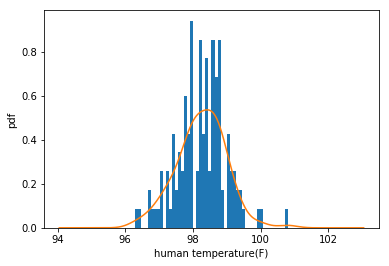

In [15]:
#Q1
plt.hist(df.temperature,bins = 50, normed = True)
df.temperature.plot(kind='kde')
plt.xlabel('human temperature(F)')
plt.ylabel('pdf')
plt.show()

From the histograms above, we could see that the temperature data is approximately normally distributed. However, there are some gaps in between the distribution, the peak is not very symmetrical, and two tails extend a bit far compared to a normal distribution.

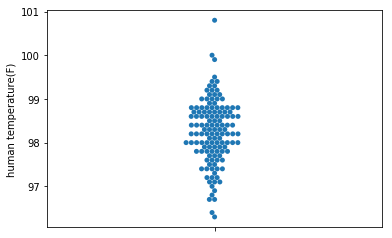

In [46]:
sns.swarmplot(y=df.temperature)
plt.ylabel('human temperature(F)')
plt.show()

In [7]:
#Q2 
print(df.shape)
df.isnull().any().sum()

(130, 3)


0

The data set contains 130 data points for temperature, so it's reasonably large-sized. We would assume the independence of observations for later analysis, but because of lack of information regarding sampling process, we don't really know the actual situation regarding the independence of observations though.

#Q3
The null hypothesis would be: H0: the mean of population is 98.6F.
We only have one set of data, therefore we are using a one-sample test. 
A z-test is used for testing the mean of a population versus a standard, or comparing the means of two populations,  with large (n ≥ 30) samples whether you know the population standard deviation or not. A t-test is used for testing the mean of one population against a standard or comparing the means of two populations if you do not know the populations’ standard deviation and when you have a limited sample (n < 30).
In this case, we are testing the mean of a population VS. a standard, with population standard deviation unknown, and sample size(130) >30. Therefore we would opt for a z-test because of the large sample size. But supposedly, the result from t-test should not be too different from z-test, as for sample set >= 30 the t distribution and z distribution are nearly the same.

In [23]:
from scipy import stats
#!pip install --user Patsy
#!pip install --user Cython
#!pip install --user statsmodels
from statsmodels.stats.weightstats import ztest
import statsmodels.stats.api as sms

In [10]:
popmean = 98.6 
t_score, pValue = stats.ttest_1samp(df.temperature, popmean, axis=0)
print("t_score:", t_score, 'p-value:',pValue)

('t_score:', -5.4548232923645195, 'p-value:', 2.4106320415561276e-07)


In [13]:
z_score, pValue = ztest(x1= df.temperature, x2=None, value=popmean, alternative='two-sided', usevar='pooled', ddof=1)
print ("z_score:", z_score, 'p-value:',pValue)

('z_score:', -5.4548232923645195, 'p-value:', 4.9021570141012155e-08)


Because population standard deviation is not available, so the sample std is treated as population std. The resulting t and z statistics are the same, but the p-value for z-test is smaller than the t-test. But they both indicate we can reject the null hypothesis that the mean is 98.6 F. 

In [21]:
#Q4, for a sample size of 10 
sample_10 = np.random.choice(df.temperature, size=10)
t_score, pValue = stats.ttest_1samp(sample_10, popmean, axis=0)
print("t_score:", t_score, 'p-value:', pValue)
z_score, pValue = ztest(x1= sample_10, x2=None, value=popmean, alternative='two-sided', usevar='pooled', ddof=1)
print ("z_score:", z_score, 'p-value:',pValue)

('t_score:', -0.6393620130910037, 'p-value:', 0.5385184771338527)
('z_score:', -0.6393620130910037, 'p-value:', 0.5225874549851894)


We could see here again, z-test gives us much lower p-value, with more statiscal significance reject the null hypothesis that the normal body temperature is 98.6F.

In [25]:
#Q5 Confidence interval, choosing 99% significance level 
print('99% CI:',sms.DescrStatsW(df.temperature).tconfint_mean(alpha=0.01))

('99% CI:', (98.08110824239758, 98.41735329606395))


Here we can see that from our sample data, the 99% confidence interval is (98.08110824239758, 98.41735329606395) for normal temperature.

In [28]:
#Q6 Difference between females and males?
men = df[df.gender == 'M']
women = df[df.gender == 'F']
print(men.shape) 
print(women.shape) #how many samples in each

(65, 3)
(65, 3)


In [31]:
#z-test: null hypothesis: the same mean, difference is zero
z_score, pValue = ztest(x1= men.temperature, x2=women.temperature, value=0, alternative='two-sided', usevar='pooled', ddof=1)
print ("z_score:", z_score, 'p-value:',pValue)

('z_score:', -2.2854345381656103, 'p-value:', 0.02228736076065755)


We can see that p-value is small enough to reject the null hypothesis at 95% significance level, but not at 99%. But considering the actual anatomy and physiology between men and women, this difference might imply practical importance. Futher we can analyze the issue using more visual methods. 

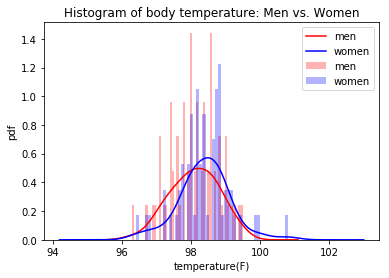

In [41]:
men.temperature.plot(kind='hist', bins=50, color = 'red', normed= True,label= 'men', alpha = 0.3)
men.temperature.plot(kind='kde',color = 'red', label= 'men' )
women.temperature.plot(kind='hist', bins=50, color = 'blue', normed= True, label= 'women',alpha = 0.3)
women.temperature.plot(kind='kde',color = 'blue',label = 'women')
plt.legend(loc='upper right')
plt.title('Histogram of body temperature: Men vs. Women')
plt.xlabel('temperature(F)')
plt.ylabel('pdf')
plt.show()

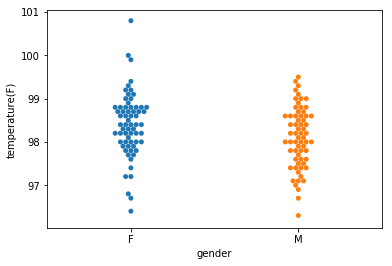

In [44]:
sns.swarmplot(x= df.gender,y=df.temperature)
plt.xlabel('gender')
plt.ylabel('temperature(F)')
plt.show()

After using hypothesis tests and visual EDA, we can reach to the following conclusions for the dataset.
1. Human temperature dataset is approximately normally distributed.
2. The dataset indicates that mean normal human temperature is not 98.6F.
3. Even small sample size of 10 still imply that the mean is not 98.6F.
4. We use 99% confidence interval to calculate the normal temperature range, and any value outside the range is considered abnormal. And 98.6F is not within the range.
5. Men and women have different body temperatures. 